In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import plotting

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import sklearn

In [7]:
%matplotlib inline

In [8]:
##Loading Input Dataset

In [9]:
data=pd.read_csv('C:/Users/aritr/ProjectDatasets/Mall_Customers.csv')

In [42]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
data.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
#Initial Data Visualization

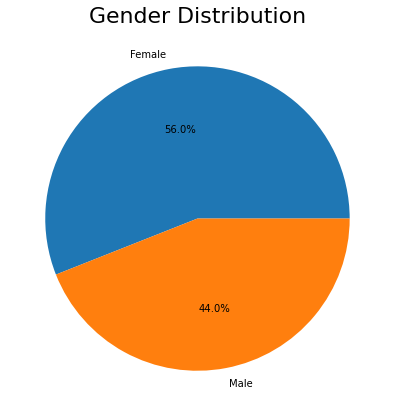

In [14]:
plt.rcParams['figure.figsize']=(7,7)
piedata=data['Gender'].value_counts()
plt.pie(piedata,labels=['Female','Male'],autopct='%1.1f%%')
plt.title('Gender Distribution',fontsize=22)
plt.show()

Text(0, 0.5, 'Count')

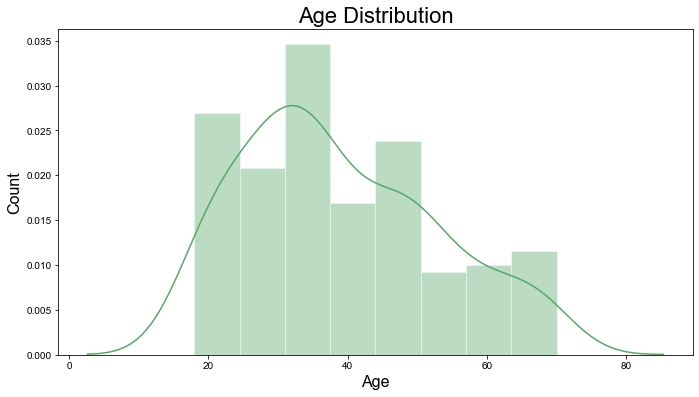

In [15]:
plt.rcParams['figure.figsize']=(25,6)
plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(data['Age'],color='g')
plt.title('Age Distribution', fontsize = 22)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

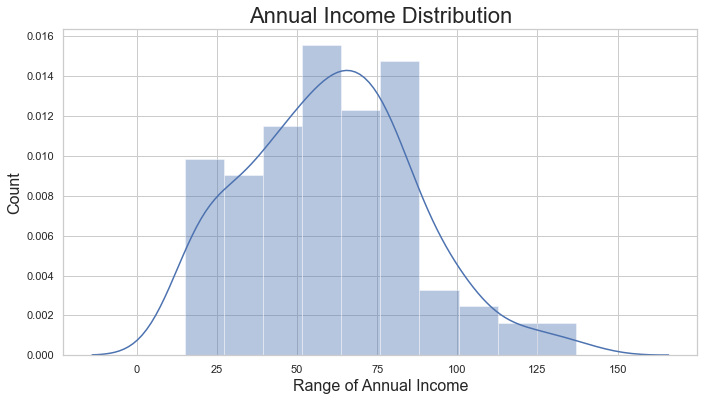

In [16]:
plt.rcParams['figure.figsize'] = (25, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Annual Income Distribution', fontsize = 22)
plt.xlabel('Range of Annual Income', fontsize=16)
plt.ylabel('Count', fontsize=16)


Text(0, 0.5, 'Count')

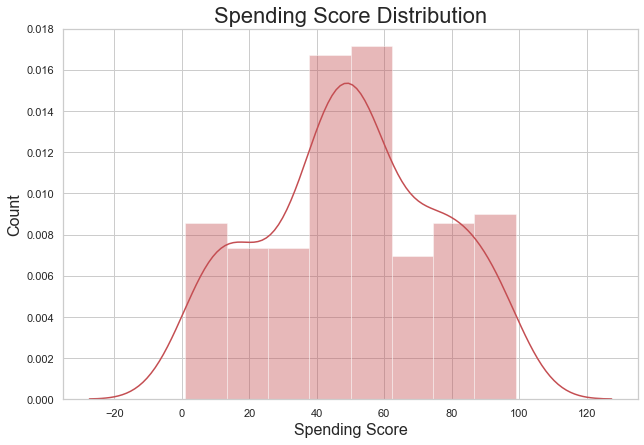

In [17]:
plt.rcParams['figure.figsize']=(35,15)
plt.subplot(2,3,3)
sns.set(style='whitegrid')
sns.distplot(data['Spending Score (1-100)'],color='r')
plt.title('Spending Score Distribution', fontsize = 22)
plt.xlabel('Spending Score', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [18]:
#Cluster Analysis

In [19]:
df=data.iloc[:,[3,4]]  #creating a dataframe of feature columns

In [20]:
df.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [21]:
x=df.values

In [22]:
print(x.shape)

(200, 2)


In [23]:
#KMeans Clustering

In [24]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'sum of squared dist. b/w each point')

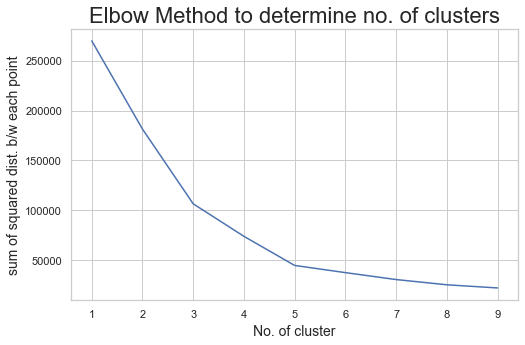

In [25]:
wcss=[]  #sum of squared dist b/w each cluster
for i in range(1,10):
    k=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init =10,random_state=0)
    k.fit(x)
    wcss.append(k.inertia_)

plt.rcParams['figure.figsize']=(8,5)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method to determine no. of clusters',fontsize=22)
plt.xlabel('No. of cluster',fontsize=14)
plt.ylabel('sum of squared dist. b/w each point' ,fontsize=14)

In [26]:
print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37239.83554245604, 30273.394312070028, 25018.576334776328, 21850.16528258562]


In [27]:
#we get 5 clusters from elbow method

In [28]:
k=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init =10,random_state=0)

In [29]:
k.fit(x)

KMeans(n_clusters=5, random_state=0)

In [30]:
clus=k.predict(x)

In [31]:
centers=k.cluster_centers_

In [32]:
#plotting scatter graph

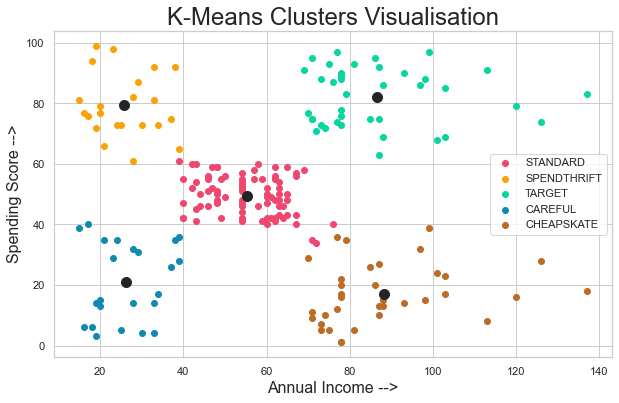

In [33]:
plt.rcParams['figure.figsize']=(10,6)
plt.scatter(x[clus==0,0],x[clus==0,1],c='#ef476f',label='STANDARD')
plt.scatter(x[clus==1,0],x[clus==1,1],c='#faa307',label='SPENDTHRIFT')
plt.scatter(x[clus==2,0],x[clus==2,1],c='#06d6a0',label='TARGET')
plt.scatter(x[clus==3,0],x[clus==3,1],c='#118ab2',label='CAREFUL')
plt.scatter(x[clus==4,0],x[clus==4,1],c='#bc6c25',label='CHEAPSKATE')
plt.scatter(centers[:,0],centers[:,1],s=100,c='#212529')
plt.title('K-Means Clusters Visualisation',fontsize=24)
plt.xlabel('Annual Income -->',fontsize=16)
plt.ylabel('Spending Score -->',fontsize=16)
plt.legend()
plt.show()

In [34]:
#Hierarchical Clustering

Text(0, 0.5, 'Distance')

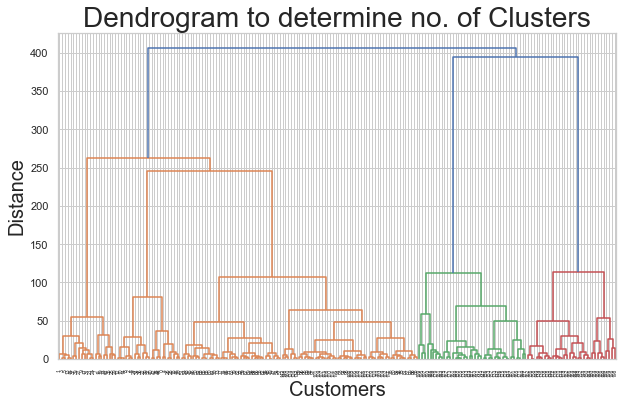

In [35]:
import scipy.cluster.hierarchy as sc
den=sc.dendrogram(sc.linkage(x,method='ward'))
#plt.rcParams['figure.figsize']=(16,8)

plt.title('Dendrogram to determine no. of Clusters',fontsize=28)
plt.xlabel('Customers', fontsize=20)
plt.ylabel('Distance', fontsize=20)

In [36]:
#we get 5 Clusters from the dendrogram(vertical line at distance=150)

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
h=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [39]:
hclus=h.fit_predict(x)

In [40]:
#plotting Scatter graph

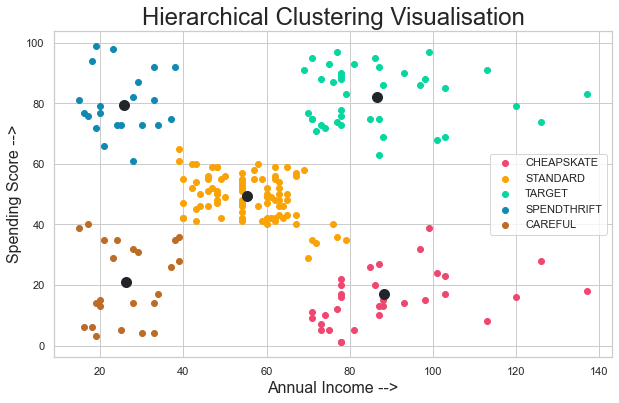

In [41]:
plt.rcParams['figure.figsize']=(10,6)
plt.scatter(x[hclus==0,0],x[hclus==0,1],c='#ef476f',label='CHEAPSKATE')
plt.scatter(x[hclus==1,0],x[hclus==1,1],c='#faa307',label='STANDARD')
plt.scatter(x[hclus==2,0],x[hclus==2,1],c='#06d6a0',label='TARGET')
plt.scatter(x[hclus==3,0],x[hclus==3,1],c='#118ab2',label='SPENDTHRIFT')
plt.scatter(x[hclus==4,0],x[hclus==4,1],c='#bc6c25',label='CAREFUL')
plt.scatter(centers[:,0],centers[:,1],s=100,c='#212529')
plt.title('Hierarchical Clustering Visualisation',fontsize=24)
plt.xlabel('Annual Income -->',fontsize=16)
plt.ylabel('Spending Score -->',fontsize=16)
plt.legend()
plt.show()